In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


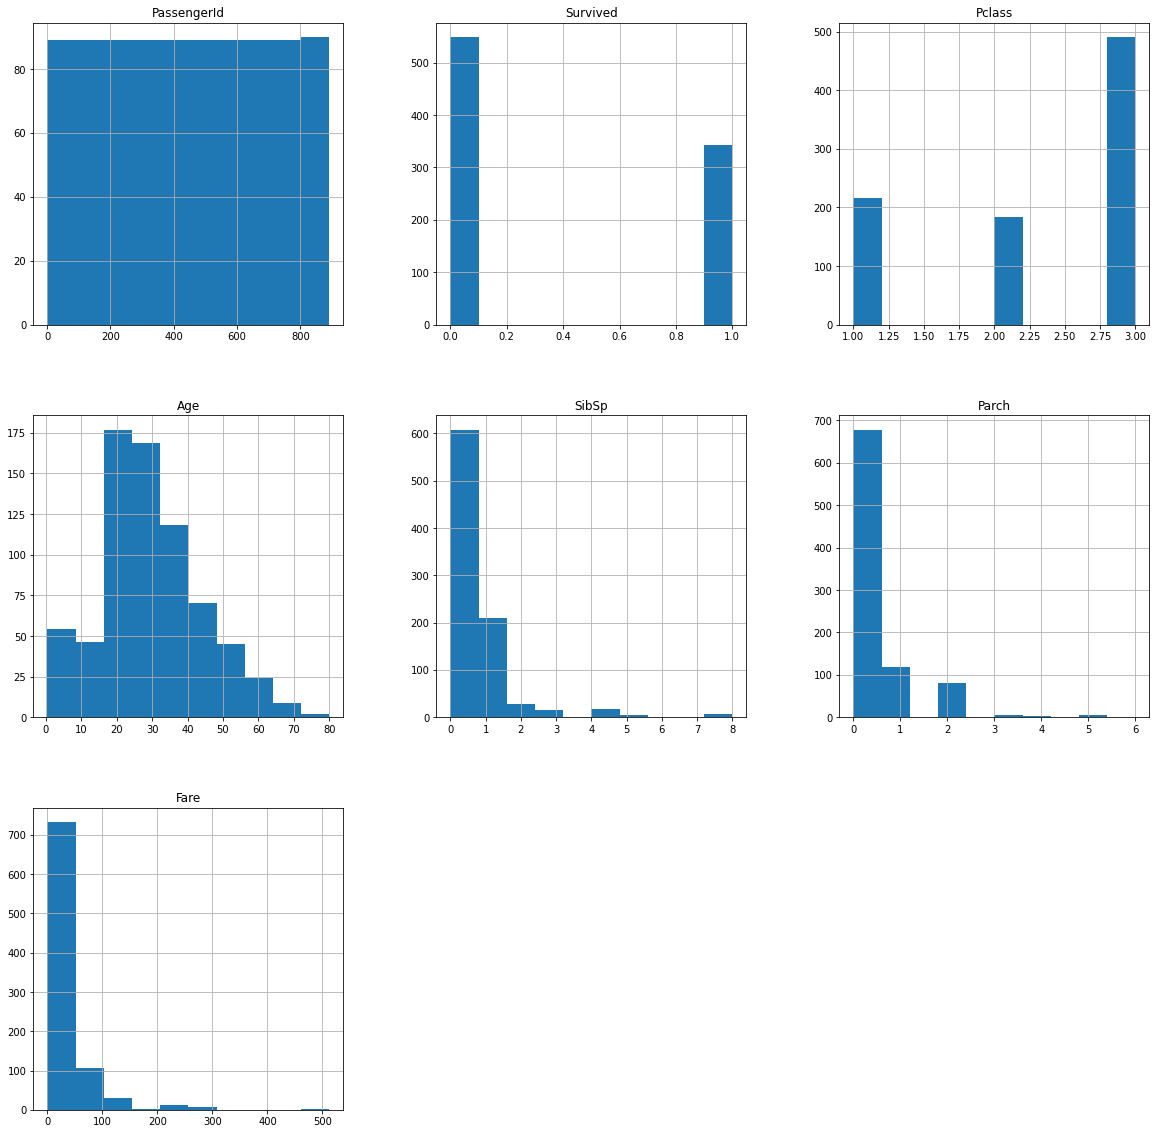

(None,)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(figsize=(20, 20))
plt.show(), 

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [9]:
pipeline_num = Pipeline([
    ('Imputer', SimpleImputer(strategy = 'median')), 
])

In [10]:
#float64(2), int64(5), object(5)

In [11]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
from sklearn.preprocessing import OrdinalEncoder #For Male and Female

In [13]:
# Cabin is a full of missing values so it is preferes to be dropped\
df.drop(['Cabin', 'Name', 'Ticket'], inplace = True, axis = 1)

In [14]:
X = df.drop(['Survived'], axis = 1)  # Creating the Training data
y = df['Survived'] # Creating the Testing data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [16]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [18]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [20]:
X = df.drop(['Survived'], axis = 1)
y = df['Survived']

In [21]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
    ('numerical', pipeline_num, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
    ('Cat', OrdinalEncoder(), ['Sex', 'Embarked']),
])


In [22]:
X_prepared = full_pipeline.fit_transform(X)

In [23]:
X_prepared

array([[ 3.    , 22.    ,  1.    , ...,  7.25  ,  1.    ,  2.    ],
       [ 1.    , 38.    ,  1.    , ..., 71.2833,  0.    ,  0.    ],
       [ 3.    , 26.    ,  0.    , ...,  7.925 ,  0.    ,  2.    ],
       ...,
       [ 3.    , 28.    ,  1.    , ..., 23.45  ,  0.    ,  2.    ],
       [ 1.    , 26.    ,  0.    , ..., 30.    ,  1.    ,  0.    ],
       [ 3.    , 32.    ,  0.    , ...,  7.75  ,  1.    ,  1.    ]])

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
y_train = np.array(y)

In [27]:
kn_clf = KNeighborsClassifier()
scores = cross_val_score(kn_clf, X_prepared, y_train, cv = 20, scoring = 'accuracy')

In [28]:
scores

array([0.53333333, 0.75555556, 0.71111111, 0.66666667, 0.68888889,
       0.75555556, 0.75555556, 0.73333333, 0.8       , 0.62222222,
       0.73333333, 0.70454545, 0.70454545, 0.79545455, 0.70454545,
       0.72727273, 0.65909091, 0.75      , 0.75      , 0.79545455])

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = [
    {'n_neighbors': [8, 9, 10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
]

kn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(kn_clf, param_grid, cv = 20, scoring = 'accuracy')
grid_search.fit(X_prepared, y_train)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [8, 9, 10],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [31]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'distance'}

In [32]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=8, weights='distance')

In [33]:
grid_search.best_score_

0.7441161616161616

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
forest_clf = RandomForestClassifier(random_state = 42)

scores = cross_val_score(forest_clf, X_prepared, y_train, cv = 30)

In [36]:
scores

array([0.73333333, 0.66666667, 0.96666667, 0.8       , 0.76666667,
       0.76666667, 0.83333333, 0.76666667, 0.73333333, 0.76666667,
       0.93333333, 0.8       , 0.9       , 0.86666667, 0.83333333,
       0.9       , 0.8       , 0.76666667, 0.8       , 0.8       ,
       0.86666667, 0.79310345, 0.72413793, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.75862069, 0.86206897, 0.96551724])

In [37]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [38]:
df_test.shape

(418, 11)

In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [40]:
df_test.drop(['Cabin', 'Name', 'Ticket'], axis = 1, inplace = True)

In [41]:
df_test['Embarked'] = df_test['Embarked'].fillna(df['Embarked'].mode().iloc[0])

In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [43]:
test_prepared = full_pipeline.transform(df_test)

In [44]:
forest_clf.fit(X_prepared, y_train)

RandomForestClassifier(random_state=42)

In [45]:
predictions = forest_clf.predict(test_prepared)

In [46]:
x = np.c_[df_test['PassengerId'], predictions]

In [47]:
dd = pd.DataFrame(x, columns=['PassengerId', 'Survived'])

In [48]:
dd

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [49]:
dd.to_csv('submission.csv', index = False)